# Recorte da Imagem para depois Equalizar novamente
* Iremos recortar a imagem para depois equalizar novamente pois melhora a qualidade da equalização;
* Eliminados os espaços em preto desnecessários da imagem, ficando apenas com o recorte da mama;
* Assim, melhora significativamente a qualidade da equalização, e como consequencia, melhora a qualidade do constraste da imagem permitindo visualizar muito mais as estruturas da mama.

In [52]:
import pydicom as dicom
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure


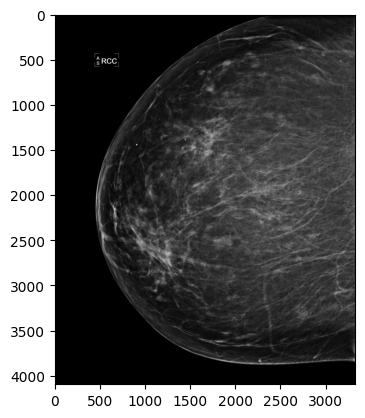

In [27]:
# Fazendo o teste para uma imagem do dataset
#localImg = "/mnt/d/ImagensDatasetFredrik/"
img = dicom.dcmread("00142_20990909_R_CC_3.dcm")

imgArray = np.array(img.pixel_array)
plt.imshow(imgArray, cmap=plt.cm.gray)

Colocar funcao do calculo dos thresholds aqui...

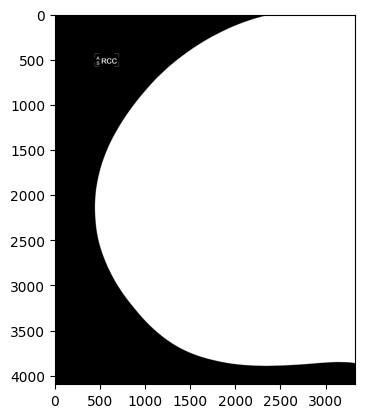

In [28]:
# todos os valores maiores que 1000 irao receber 1, senao recebe 0
ret, temp1 = cv2.threshold(imgArray, 0, np.max(imgArray), cv2.THRESH_BINARY)
arrayThresh = temp1.astype('uint8')

# verificando....
plt.imshow(arrayThresh, cmap=plt.cm.gray);

In [29]:
# Iremos pegar os contornos da imagem
# Utilizando cv2.CHAIN_APPROX_SIMPLE pegamos apenas as bordas do contorno da imagem, assim poupando processamento e memoria
countours = cv2.findContours(arrayThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
countours = imutils.grab_contours(countours)
countours = sorted(countours, key= cv2.contourArea, reverse = True) #pegando as coordenadas que resultam na maior área
rect = cv2.boundingRect(countours[0])

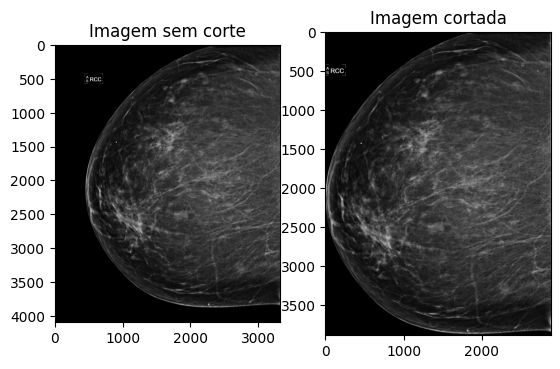

In [30]:
# Coordenadas
x,y,w,h = rect

# Corta imagem com as coordenadas
imgCroped = (imgArray)[y:y+h, x:x+w].copy()

# Comparacao
plt.subplot(1,2,1)
plt.imshow(imgArray, cmap=plt.cm.gray)
plt.title("Imagem sem corte")
plt.subplot(1, 2, 2)
plt.imshow(imgCroped, cmap=plt.cm.gray)
plt.title("Imagem cortada");

# Criando uma máscara e extraindo apenas a mama

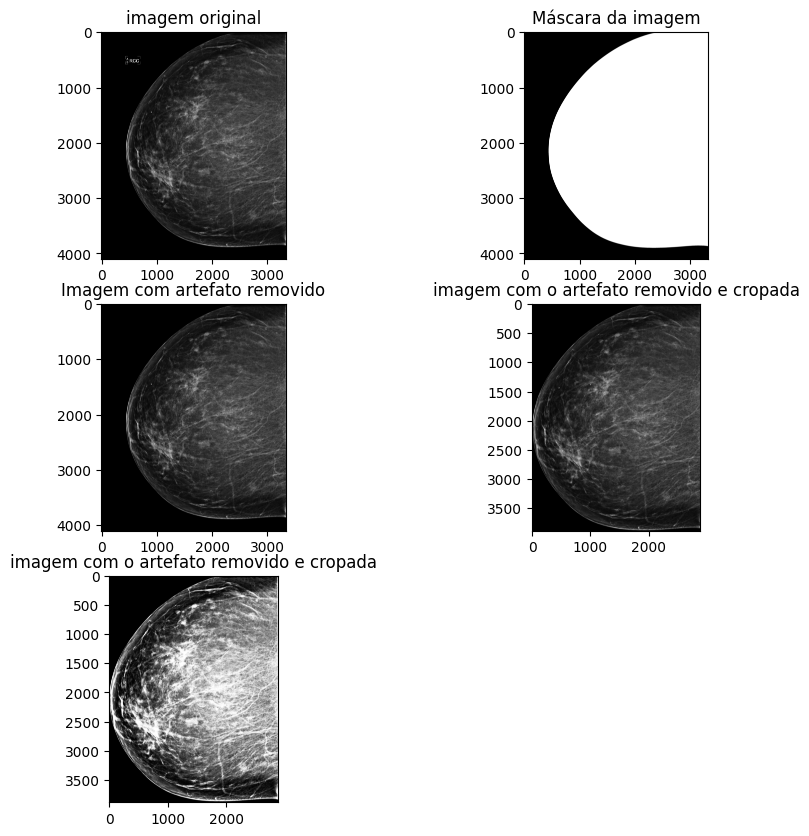

In [56]:
# Load the MRI image of the brain
img = dicom.dcmread("00142_20990909_R_CC_3.dcm")
imgArray = img.pixel_array



# Apply Otsu's threshold to binarize the image
thresh = cv2.threshold(imgArray, 0, np.max(imgArray), cv2.THRESH_BINARY)[1].astype('uint8')

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the brain region)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask from the largest contour
mask = np.zeros_like(thresh)


cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

# Multiply the original image with the mask to crop the irregular shape
dst = cv2.bitwise_and(imgArray, imgArray, mask=mask)

rect = cv2.boundingRect(largest_contour)
# Coordenadas
x,y,w,h = rect

# Corta imagem com as coordenadas
imgCroped = (dst)[y:y+h, x:x+w].copy()



plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.title('imagem original')
plt.imshow(imgArray, cmap='gray')
plt.subplot(3,2,2)
plt.title("Máscara da imagem")
plt.imshow(mask, cmap='gray')
plt.subplot(3,2,3)
plt.title("Imagem com artefato removido")
plt.imshow(dst, cmap='gray')
plt.subplot(3,2,4)
plt.title("imagem com o artefato removido e cropada")
plt.imshow(imgCroped, cmap='gray')

plt.subplot(3,2,5)
plt.title("imagem com o artefato removido e cropada")
plt.imshow(exposure.equalize_hist(imgCroped, clip_limit=0.1), cmap='gray')

